In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

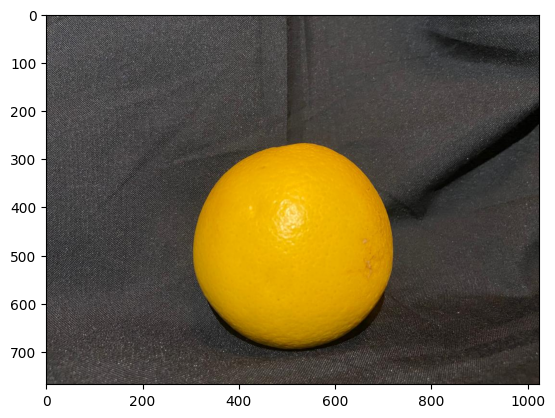

In [30]:
muestra1 = cv.imread('src/Naranja Buena Calidad (0).jpeg')
plt.imshow(cv.cvtColor(muestra1, cv.COLOR_BGR2RGB))

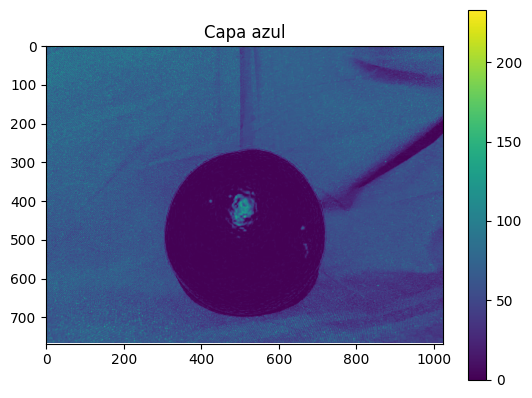

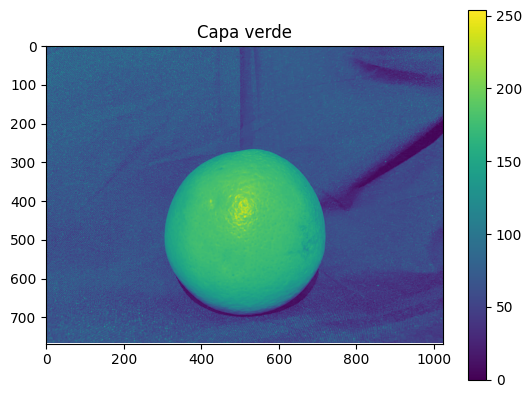

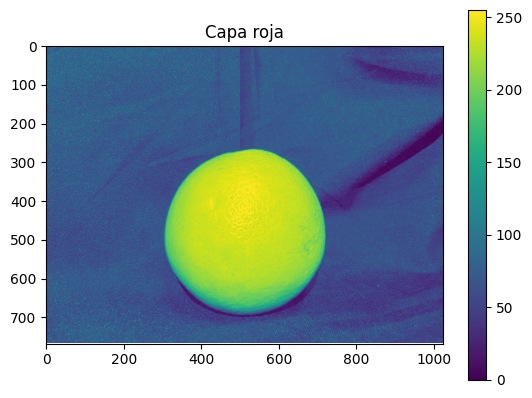

-1

In [32]:
(b_muestra1,g_muestra1,r_muestra1) = cv.split(muestra1)
cv.imshow('blue mask', b_muestra1)
cv.imshow('green mask', g_muestra1)
cv.imshow('red mask', r_muestra1)

plt.imshow(b_muestra1)
plt.colorbar()
plt.title('Capa azul')
plt.show()

plt.imshow(g_muestra1)
plt.colorbar()
plt.title('Capa verde')
plt.show()

plt.imshow(r_muestra1)
plt.colorbar()
plt.title('Capa roja')
plt.show()

cv.waitKey(0)

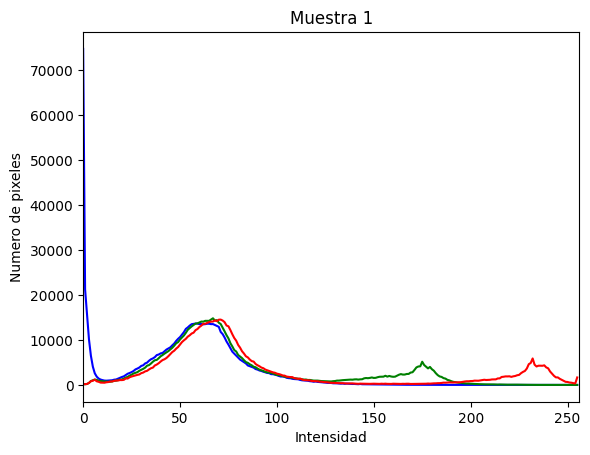

In [33]:
def DistribucionBGR(nombre,img):
    colors = ('b', 'g', 'r')
    for i, col in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0,256])
        plt.plot(hist, color = col)
        plt.xlim([0,256])
    plt.title(nombre)
    plt.xlabel('Intensidad')
    plt.ylabel('Numero de pixeles')
    plt.show()

DistribucionBGR('Muestra 1', muestra1)

In [34]:
b_bilateral = cv.bilateralFilter(b_muestra1, 15, 35, 25)
g_bilateral = cv.bilateralFilter(g_muestra1, 15, 35, 25)
r_bilateral = cv.bilateralFilter(r_muestra1, 15, 35, 25)

cv.imshow('Bilateral de capa azul', b_bilateral)
cv.imshow('Bilateral de capa verde', g_bilateral)
cv.imshow('Bilateral de capa roja', r_bilateral)

cv.waitKey(0)

-1

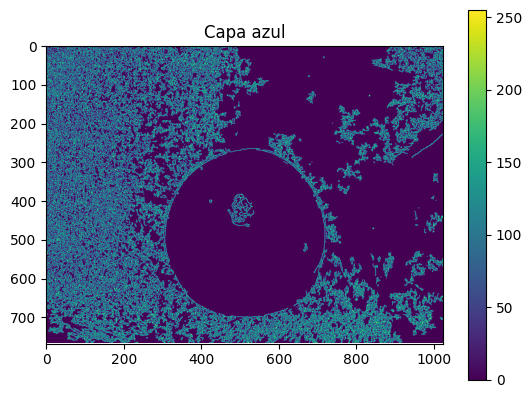

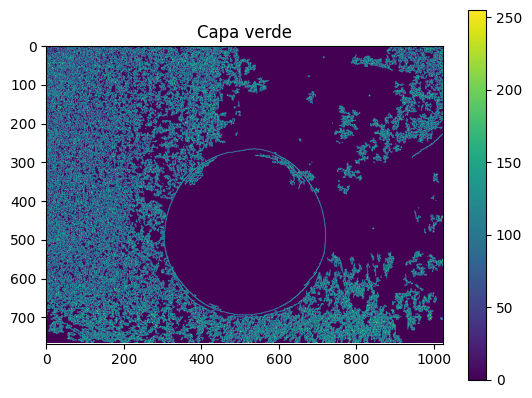

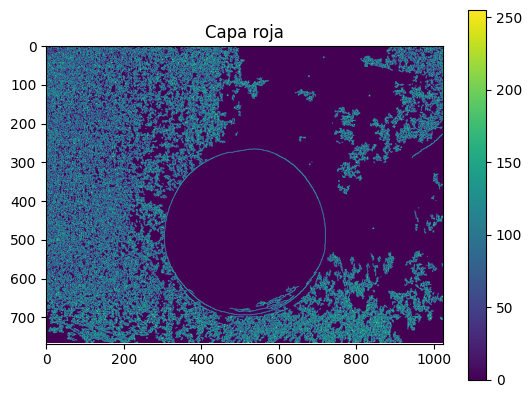

-1

In [35]:
b_canny = cv.Canny(b_muestra1, 0, 255)
g_canny = cv.Canny(g_muestra1, 0, 255)
r_canny = cv.Canny(r_muestra1, 0, 255)


plt.imshow(b_canny)
plt.colorbar()
plt.title('Capa azul')
plt.show()

plt.imshow(g_canny)
plt.colorbar()
plt.title('Capa verde')
plt.show()

plt.imshow(r_canny)
plt.colorbar()
plt.title('Capa roja')
plt.show()


cv.imshow('Capa azul canny', b_canny)
cv.imshow('Capa green canny', g_canny)
cv.imshow('Capa red canny', r_canny)


cv.waitKey(0)

In [36]:
b_threshold, b_thresh = cv.threshold(b_muestra1, 150, 255, cv.THRESH_OTSU)
cv.imshow('Capa azul Thesholded', b_thresh)

g_threshold, g_thresh = cv.threshold(g_muestra1, 150, 255, cv.THRESH_OTSU)
cv.imshow('Capa verde Thesholded', g_thresh)

r_threshold, r_thresh = cv.threshold(r_muestra1, 150, 255, cv.THRESH_OTSU)
cv.imshow('Capa roja Thesholded', r_thresh)


b_bilateral_threshold, b_bilateral_thresh = cv.threshold(b_bilateral, 150, 255, cv.THRESH_OTSU)
cv.imshow('Capa azul blured Thesholded', b_bilateral_thresh)

g_bilateral_threshold, g_bilateral_thresh = cv.threshold(g_bilateral, 150, 255, cv.THRESH_OTSU)
cv.imshow('Capa verde blured Thesholded', g_bilateral_thresh)

r_bilateral_threshold, r_bilateral_thresh = cv.threshold(r_bilateral, 150, 255, cv.THRESH_OTSU)
cv.imshow('Capa roja blured Thesholded', r_bilateral_thresh)

cv.waitKey(0)

-1

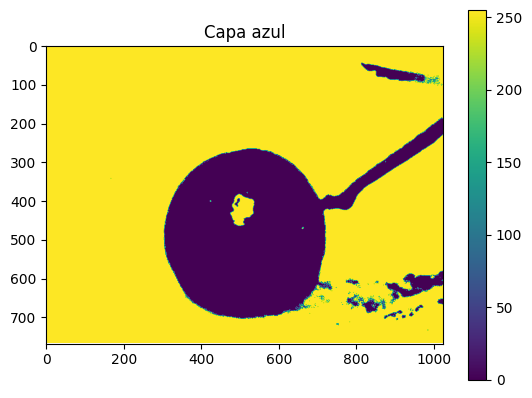

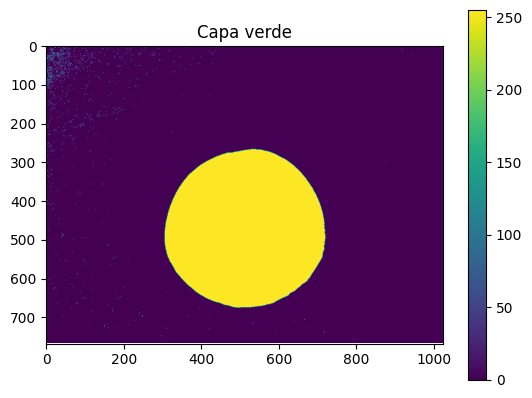

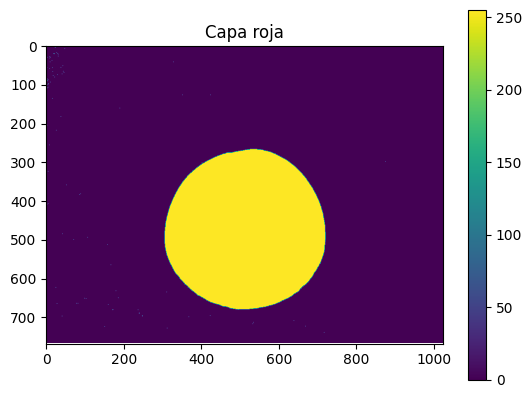

In [37]:
plt.imshow(b_bilateral_thresh)
plt.colorbar()
plt.title('Capa azul')
plt.show()

plt.imshow(g_bilateral_thresh)
plt.colorbar()
plt.title('Capa verde')
plt.show()

plt.imshow(r_bilateral_thresh)
plt.colorbar()
plt.title('Capa roja')
plt.show()

Cantidad de componentes conectados:  91


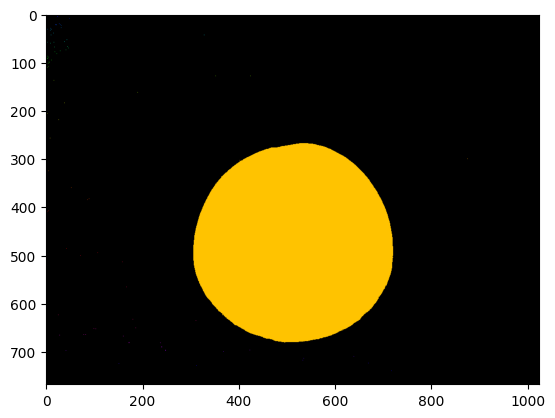

In [38]:

retval, labels, stats, centroids = cv.connectedComponentsWithStats(r_bilateral_thresh)

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

plt.imshow(labeled_img)

print('Cantidad de componentes conectados: ', retval)
#print(labels)


-1

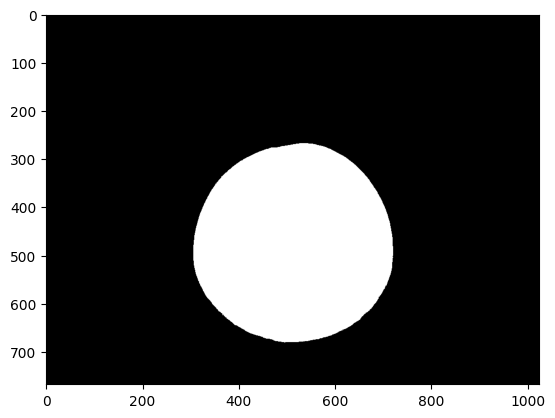

In [39]:
area_min = 200

for i in range(0, retval):
    area = stats[i, cv.CC_STAT_AREA]
    if area < area_min:
        #print('Area: {}'.format(area))
        
        indices = np.where(labels == i)
        r_bilateral_thresh[indices] = 0

plt.imshow(r_bilateral_thresh, cmap='gray')

cv.imshow('Imagen aislada', r_bilateral_thresh)
cv.waitKey(0)

https://drive.google.com/drive/folders/1VHw0t6vWdAgdRXYDMBozNLrj7No1IMxt

https://www.youtube.com/watch?v=o0SSZPmKXZU


In [40]:
contours, hierarchy = cv.findContours(r_bilateral_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [41]:
muestraContorno = cv.drawContours(muestra1, contours, -1, (0,255,0), 3)
cv.imshow('Contornos', muestraContorno)

cv.waitKey(0)


-1

In [42]:

perimetro = cv.arcLength(contours[0], True)
area = cv.contourArea(contours[0])
print(f"El perimetro de la naranja es de: {perimetro} pixeles\nEl area de la naranja es de {area} pixeles")

El perimetro de la naranja es de: 1389.7514293193817 pixeles
El area de la naranja es de 133696.5 pixeles


In [43]:
rect = cv.minAreaRect(contours[0])
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(muestra1, [box], 0, (0,0,255), 2)
cv.imshow('Min rectangulo', muestra1)
cv.waitKey(0)

-1

In [44]:
suma = 0
cant = 0
for i in b_muestra1:
    for j in i:
        cant += 1
        suma += j
print(suma/cant)

for i in g_muestra1:
    for j in i:
        cant += 1
        suma += j
print(suma/cant)

for i in r_muestra1:
    for j in i:
        cant += 1
        suma += j
print(suma/cant)

[[ 92  47  38 ...  50  83  43]
 [112  86  52 ...  66  82  59]
 [101 120 108 ...  39  59  73]
 ...
 [ 73  71  72 ...  47  44  39]
 [ 63  61  62 ...  42  42  42]
 [ 64  62  63 ...  30  34  39]]
51.26423772176107
65.87491607666016
74.88058217366536


In [49]:
blueMask = cv.bitwise_or(b_muestra1, b_muestra1, mask = r_bilateral_thresh)
greenMask = cv.bitwise_or(g_muestra1, g_muestra1, mask = r_bilateral_thresh)
redMask = cv.bitwise_or(r_muestra1, r_muestra1, mask = r_bilateral_thresh)

cv.imshow('mascara azul', blueMask)
cv.imshow('mascara verde', greenMask)
cv.imshow('mascara roja', redMask)

cv.waitKey(0)

-1

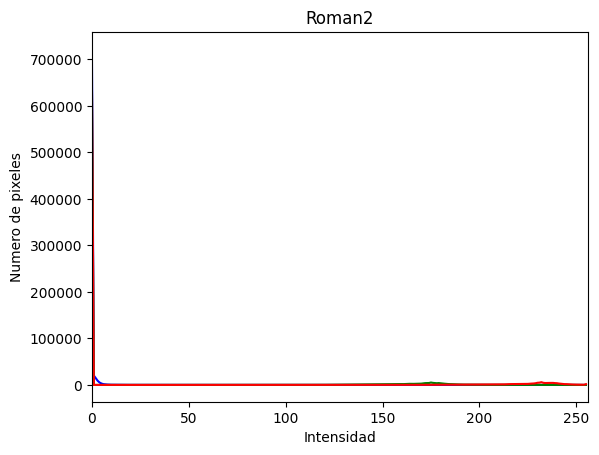

-1

In [57]:
merged = cv.merge([blueMask, greenMask, redMask])

DistribucionBGR('Roman2', merged)

cv.waitKey(0)


In [70]:
suma = 0
cant = 0
for i in blueMask:
    for j in i:
        if j != 0:
            cant += 1
            suma += j
res = suma/(2.55*cant)
print(res)

suma = 0
cant = 0
for i in greenMask:
    for j in i:
        if j != 0:
            cant += 1
            suma += j
res = suma/(2.55*cant)
print(res)


suma = 0
cant = 0
for i in redMask:
    for j in i:
        if j != 0:
            cant += 1
            suma += j
res = suma/(2.55*cant)
print(res)

3.1179753521776177
64.8475294327897
87.55559721617512
